# 📈 Inflation Report

---

In this notebook we showcase how easy it is to generate an automated inflation report using TUKAN's API.

## 🎨 TUKAN Stylesheet and Fonts

---

This loads our brand style and font guidelines.

In [1]:
# Import matplotlib, fonts and stylesheet (optional)

import os
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

font_path = "../../../assets/fonts"

for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y)
            except Exception:
                continue

plt.style.use("../../../assets/mpl_styles/tukan_style.mplstyle")

AttributeError: module 'matplotlib.dates' has no attribute '_rcParam_helper'

## 🔨 Libraries and Report Functions

---

In [2]:
import pandas as pd
from tukan_mkt.inflation_report.inflation_plots import *

## The Charts

### Anual Inflation

Success getting the data
Annual inflation came in at 7.45% during Mar-2022


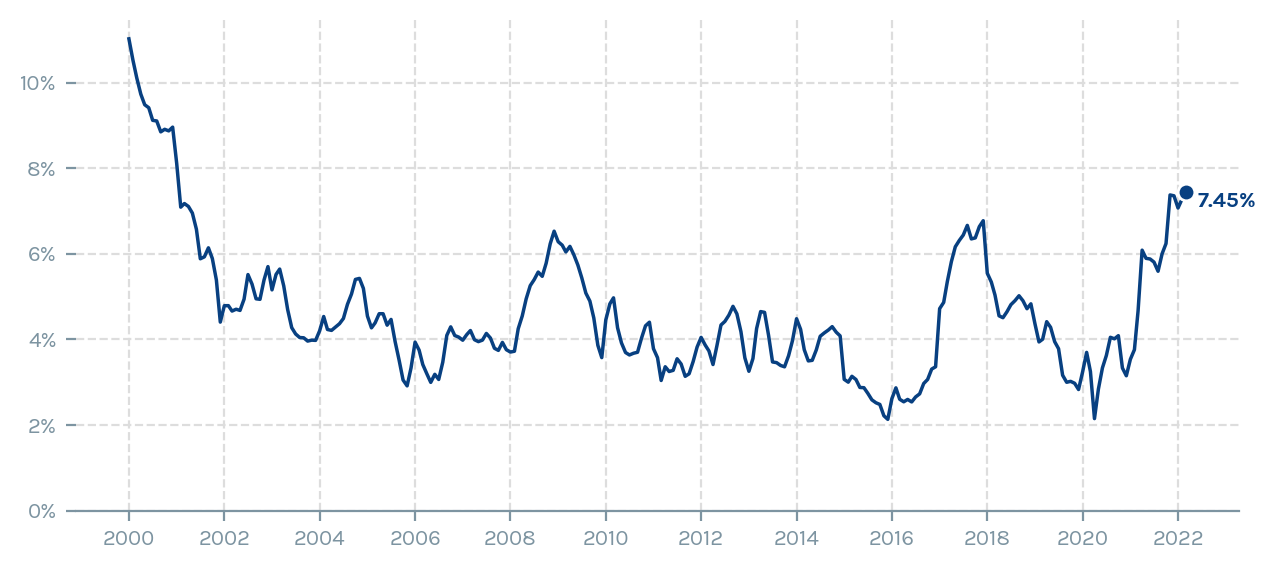

In [3]:
fig = plt.figure(dpi = 200)
mex_annual_inflation_line(fig)
plt.savefig(
   "plots/yoy_cpi_change.svg",
   dpi=300,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)

### Core vs. Non-Core Inflation

Success getting the data
Success getting the data


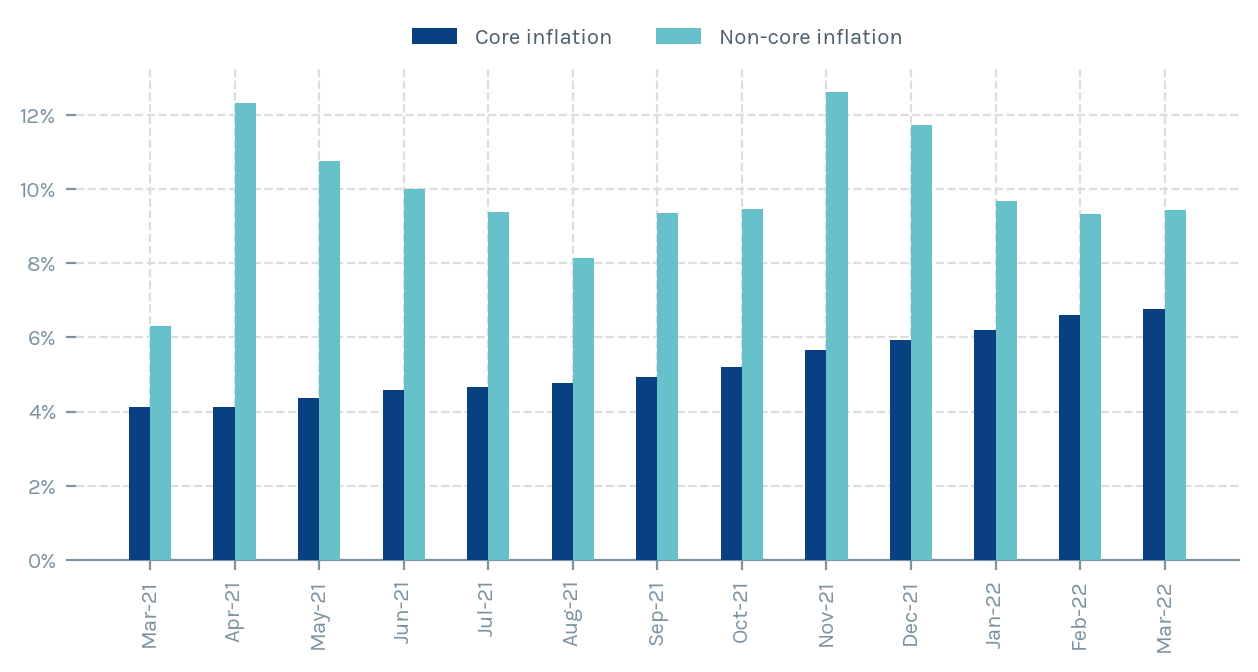

In [4]:
fig = plt.figure(dpi = 200)
mex_annual_core_vs_noncore(fig)
plt.savefig(
   "plots/core_vs_non_core_change.svg",
   dpi=300,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)

### Core Inflation Components

Success getting the data
Success getting the data


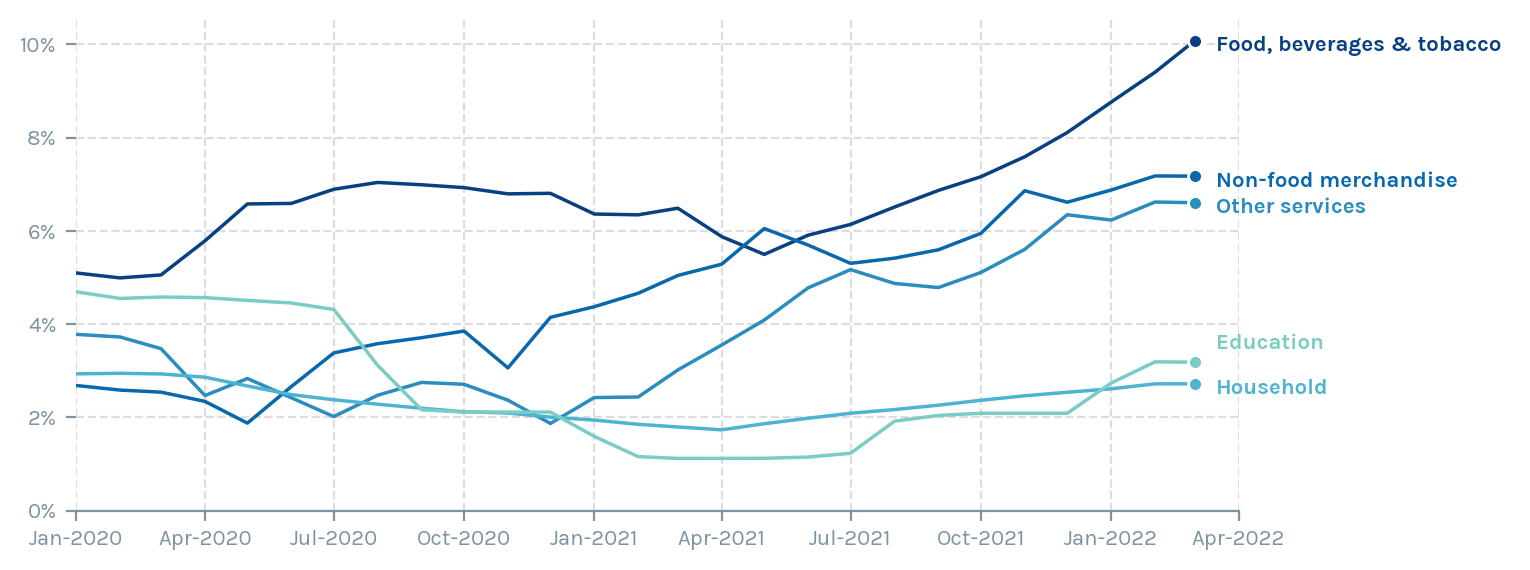

In [5]:
fig = plt.figure(dpi = 200)
mex_annual_core_components(fig)
plt.savefig(
   "plots/core_subindices.svg",
   dpi=300,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)

### Non-core Inflation Components

Success getting the data
Success getting the data


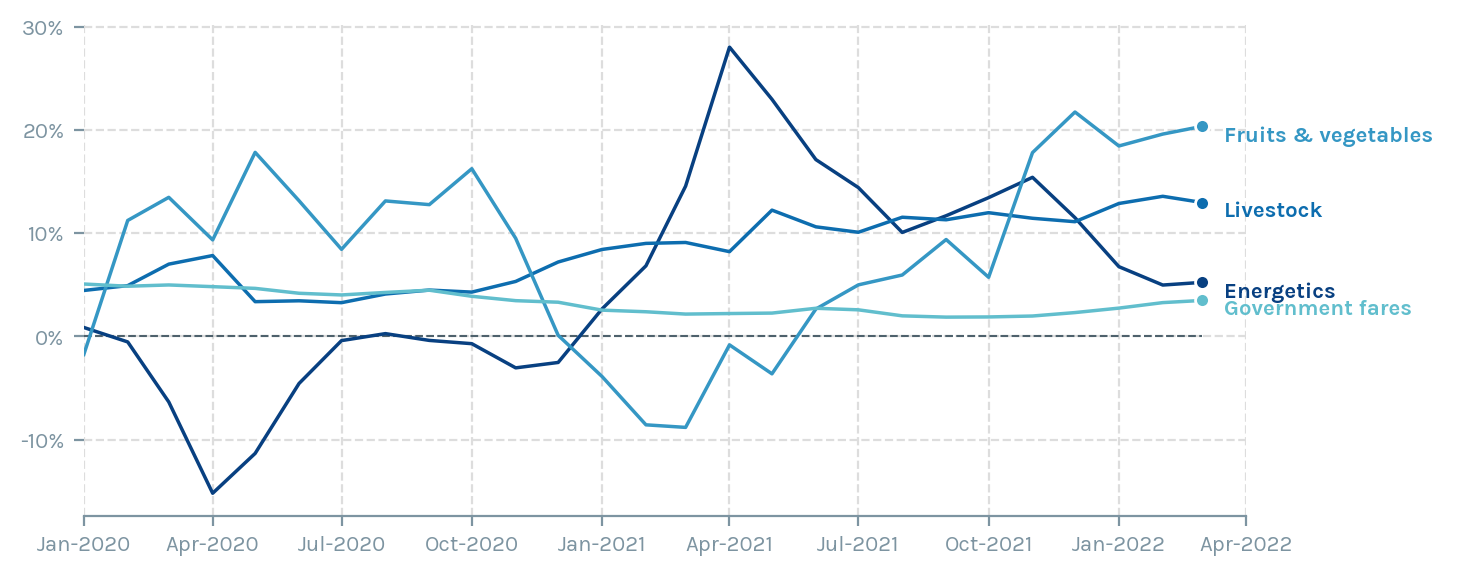

In [6]:
fig = plt.figure(dpi = 200)
mex_annual_noncore_components(fig)
plt.savefig(
   "plots/non_core_subindices.svg",
   dpi=300,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)

### Top 20 Core & Non-Core Inflation Products

Success getting the data
Success getting the data


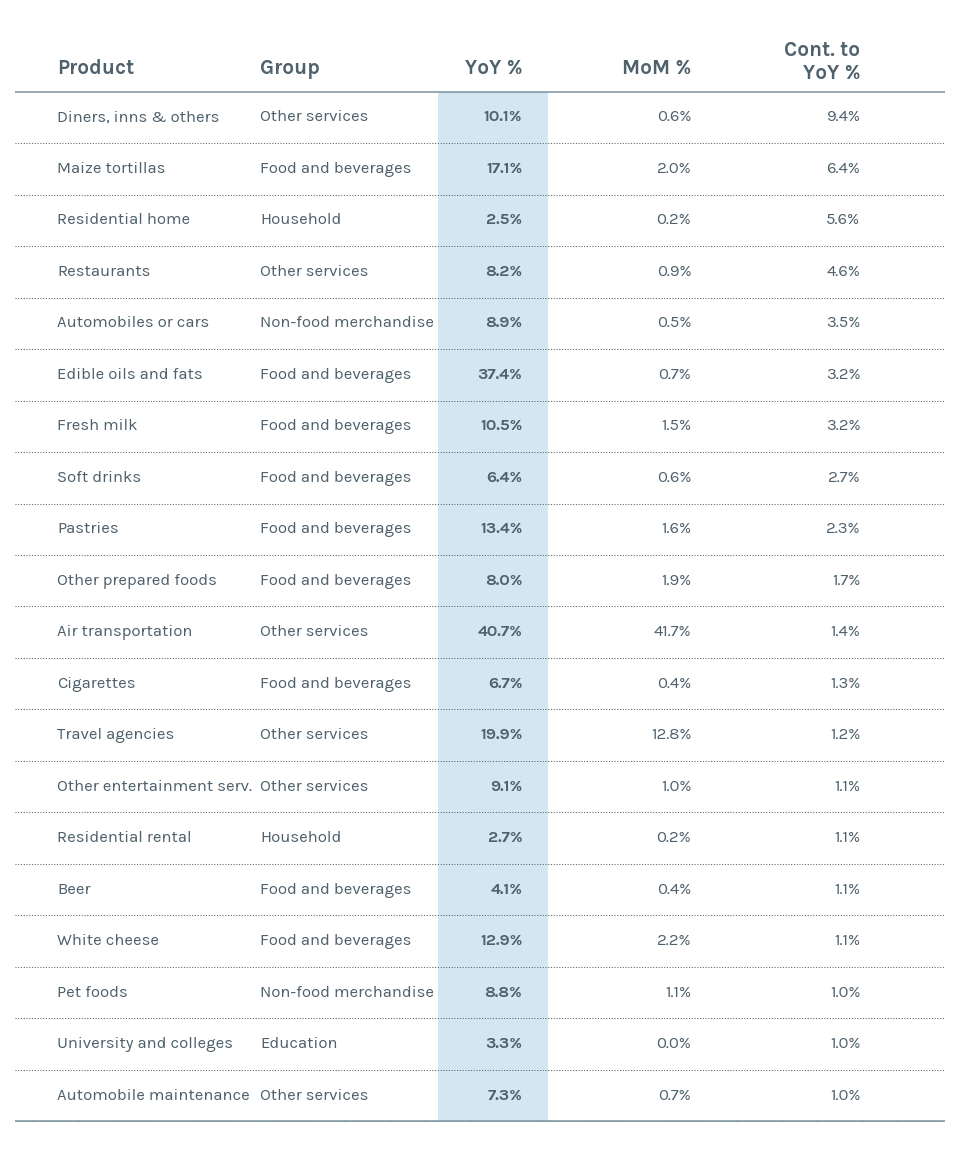

In [7]:
fig = plt.figure(figsize = (8,10), dpi = 150)
mex_core_top20_products(fig)
plt.savefig(
   "plots/core_top_20.svg",
   dpi=300,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)

Success getting the data
Success getting the data


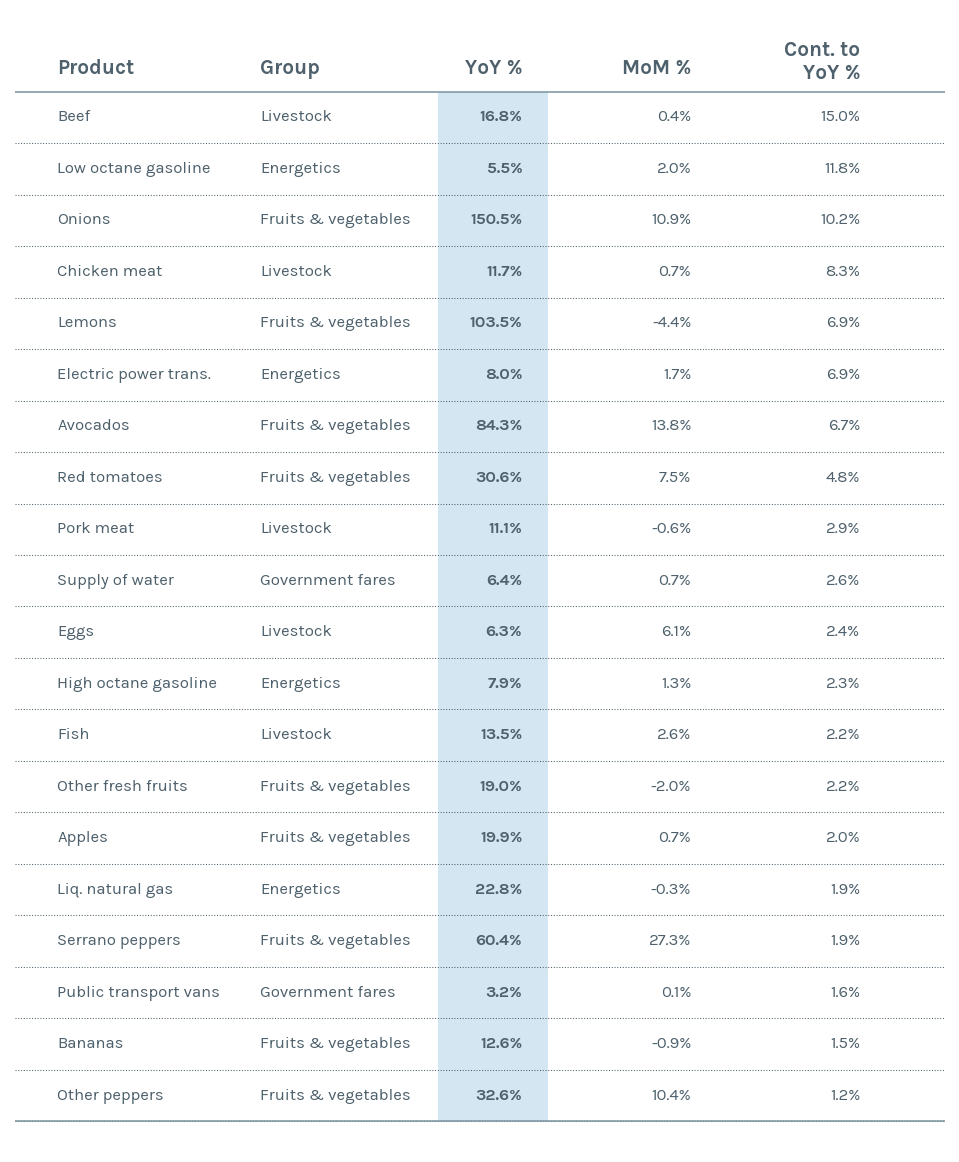

In [10]:
fig = plt.figure(figsize = (8,10), dpi = 150)
mex_noncore_top20_products(fig)
plt.savefig(
   "plots/non_core_top_20.svg",
   dpi=300,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)

### Inflation by Economic Activity

Success getting the data


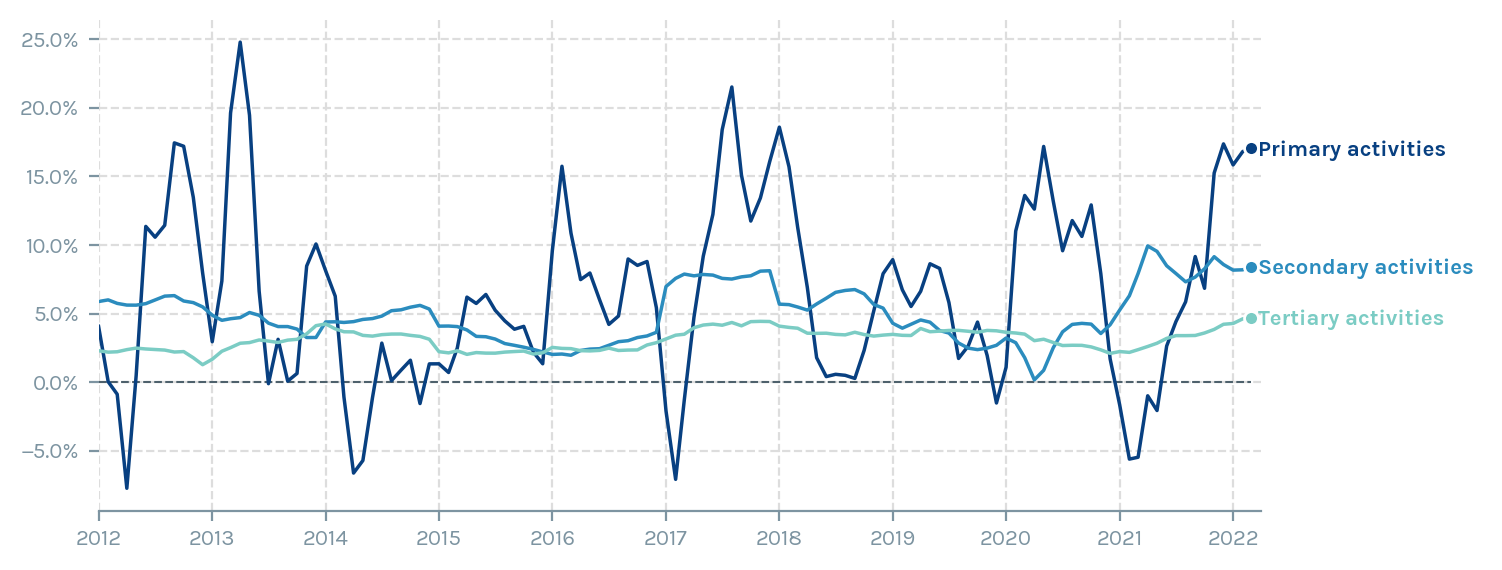

In [8]:
# By NAICS sector.

fig = plt.figure(dpi = 200)
mex_activity_inflation(fig)
plt.savefig(
   "plots/naics_sectors_yoy.svg",
   dpi=300,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)

Success getting the data


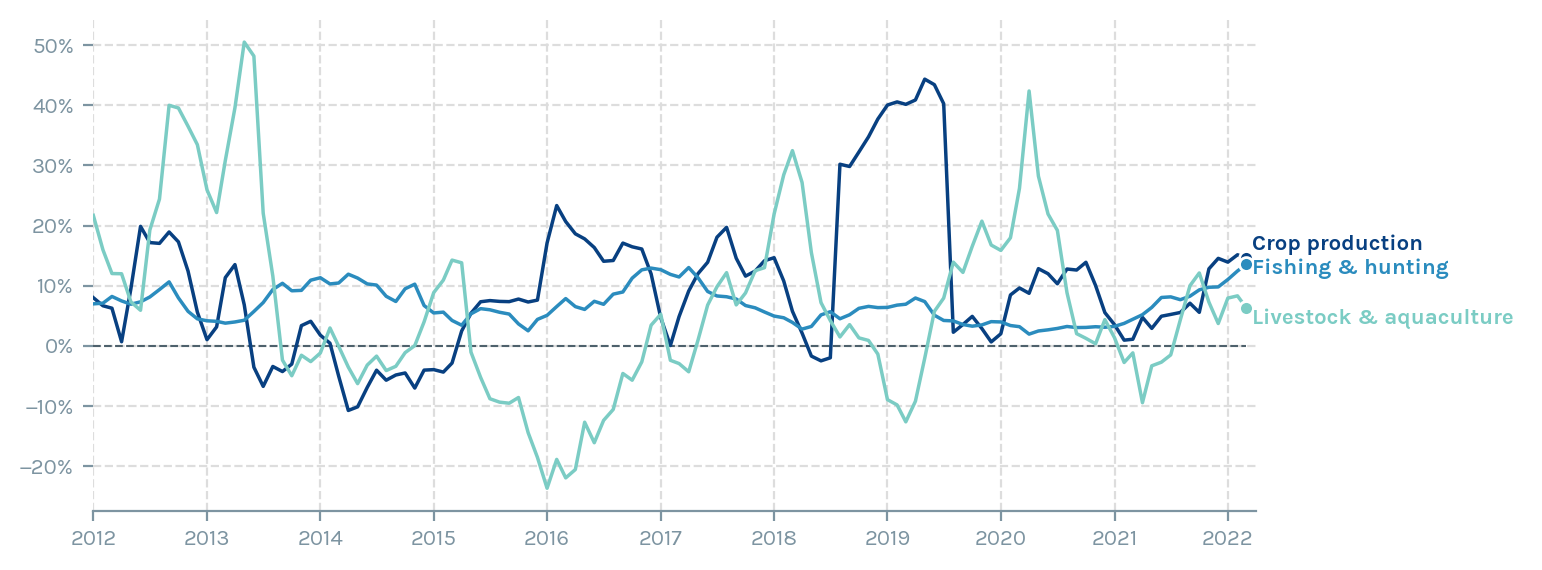

In [9]:
# By NAICS Primary sector.

fig = plt.figure(dpi = 200)
mex_primary_activity_inflation(fig)
plt.savefig(
   "plots/primary_sectors_yoy.svg",
   dpi=300,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)

Success getting the data


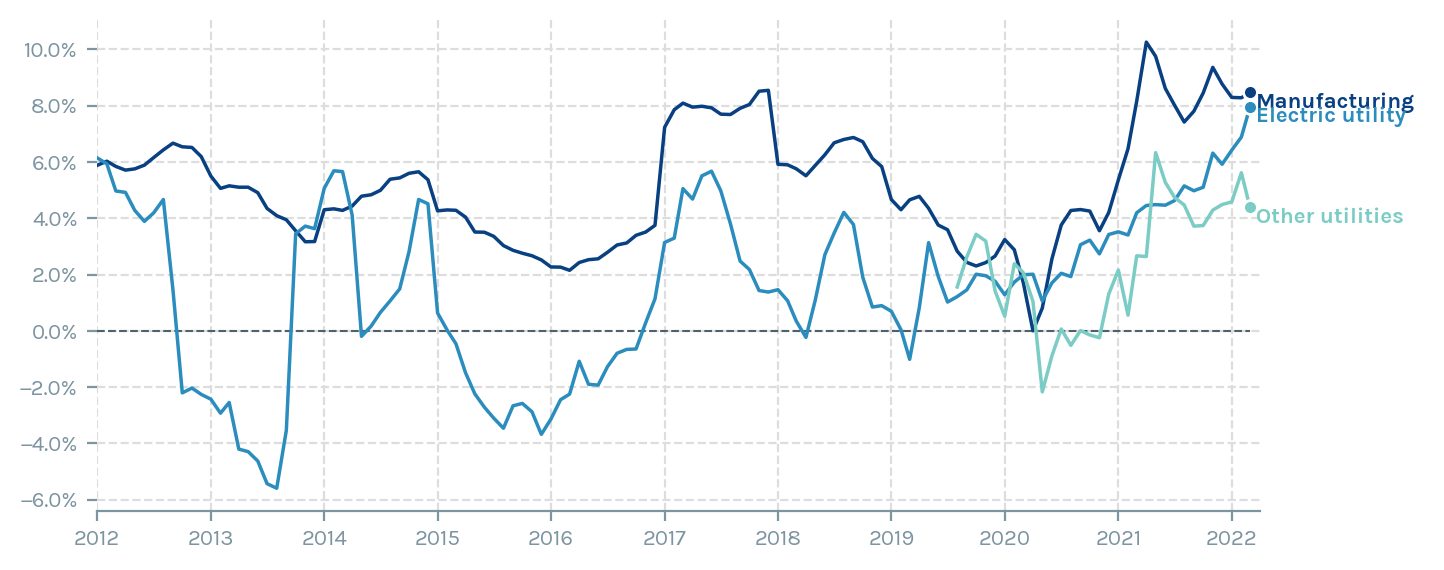

In [11]:
# By NAICS Secondary sector.

fig = plt.figure(dpi = 200)
mex_secondary_activity_inflation(fig)
plt.savefig(
   "plots/secondary_sectors_yoy.svg",
   dpi=300,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)

Success getting the data


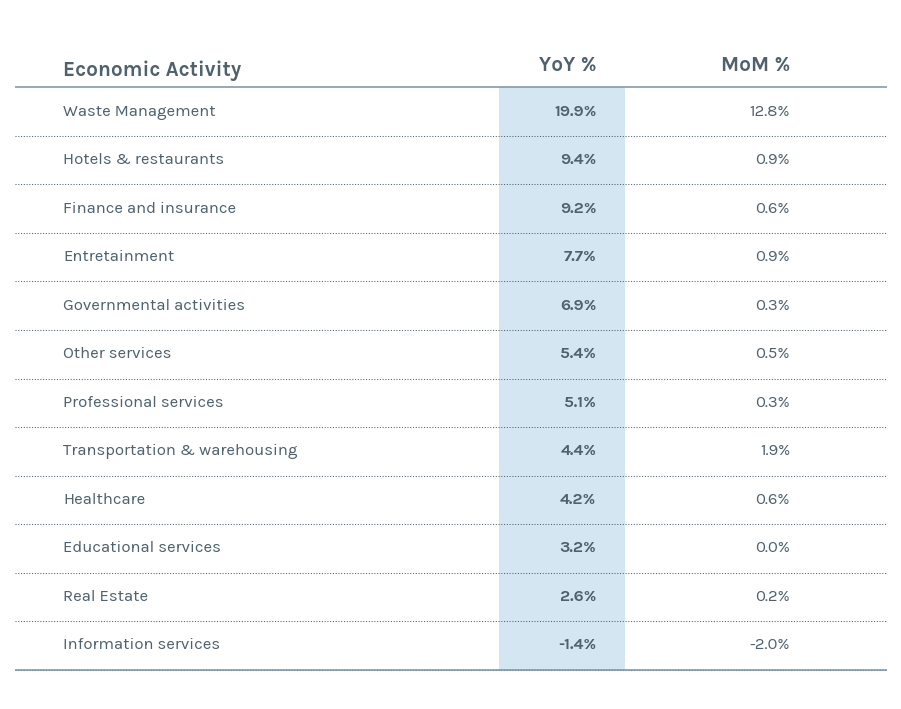

In [13]:
# By NAICS Tertiary sector.

fig = plt.figure(figsize = (7.5,6), dpi = 150)
mex_tertiary_activity_inflation(fig)
plt.savefig(
   "plots/tertiary_sectors_yoy.svg",
   dpi=300,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)

In [21]:
    payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "en",
    "group_by": [
        "economic_activity"
    ],
    "categories": {
        "economic_activity": [
            "f5adaadda584ca7",
            "e426cc87d0540ab",
            "990b94ebe38c9ca",
            "d35f5b82779e7d5",
            "3726993cc9fecab",
            "bbb49ae78601ab9",
            "4bc9836c2d7e60a",
            "fcb303b72a98f6c",
            "d05c3b2b73d75fc",
            "feb7bb4445c808d",
            "a07267f78158c2c",
            "44d246411040129"
        ]
    },
    "request": [
        {
            "table": "mex_inegi_inpc_scian_monthly",
            "variables": [
                "c572db59b8cd109"
            ]
        }
    ],
    "from": "2019-01-01"
}
    
    response = get_tukan_api_request(payload)
    data = response["data"]

    data.replace({'Administrative and support and waste management and remediation services':'Waste Management',
       'Real estate and rental and leasing':'Real Estate',
       'Health care and social assistance':'Healthcare',
       'Other services (except public administration)':'Other services',
       'Professional, scientific, and technical services':'Professional services',
       'Arts, entertainment, and recreation':'Entretainment', 'Finance and insurance':'Finance and insurance',
       'Accommodation and food services':'Hotels & restaurants', 'Information':'Information services',
       'Governmental, legislative activities of law enforcement and international and extraterritorial bodies':'Governmental activities',
       'Educational services':'Educational services', 'Transportation and warehousing':'Transportation & warehousing'}, inplace=True)

Success getting the data


In [22]:
    data.loc[:, "12_m_lag"] = data.groupby(
    ["economic_activity"])["c572db59b8cd109"].shift(12)
    data.loc[:, "1_m_lag"] = data.groupby(
    ["economic_activity"])["c572db59b8cd109"].shift(1)

    # True YoY and MoM Change
    data.loc[:,"yoy_change"] = data["c572db59b8cd109"]/data["12_m_lag"] - 1
    data.loc[:,"mom_change"] = data["c572db59b8cd109"]/data["1_m_lag"] - 1

    data = data[data["date"] == data["date"].max()].copy()
    data = data.sort_values(by = "yoy_change", ascending=True)
    data

,date,economic_activity__ref,economic_activity,c572db59b8cd109,12_m_lag,1_m_lag,yoy_change,mom_change
452,2022-02-01,e426cc87d0540ab,Information services,102.430013,101.576380,102.357348,0.008404,0.000710
445,2022-02-01,44d246411040129,Real Estate,108.913806,106.132486,108.622700,0.026206,0.002680
454,2022-02-01,fcb303b72a98f6c,Educational services,114.161703,110.612888,113.603608,0.032083,0.004913
455,2022-02-01,feb7bb4445c808d,Transportation & warehousing,110.480186,106.816166,110.083175,0.034302,0.003606
446,2022-02-01,4bc9836c2d7e60a,Healthcare,115.479816,111.025687,114.653477,0.040118,0.007207
448,2022-02-01,a07267f78158c2c,Professional services,118.852381,113.066404,117.270171,0.051173,0.013492
447,2022-02-01,990b94ebe38c9ca,Other services,116.594527,110.688326,115.798231,0.053359,0.006877
449,2022-02-01,bbb49ae78601ab9,Entretainment,112.647004,105.579427,111.533704,0.066941,0.009982
453,2022-02-01,f5adaadda584ca7,Governmental activities,124.007974,116.149618,120.703930,0.067657,0.027373
451,2022-02-01,d35f5b82779e7d5,Hotels & restaurants,122.518951,112.334976,121.195352,0.090657,0.010921


(0.0, 4.5, -1.0, 13.0)

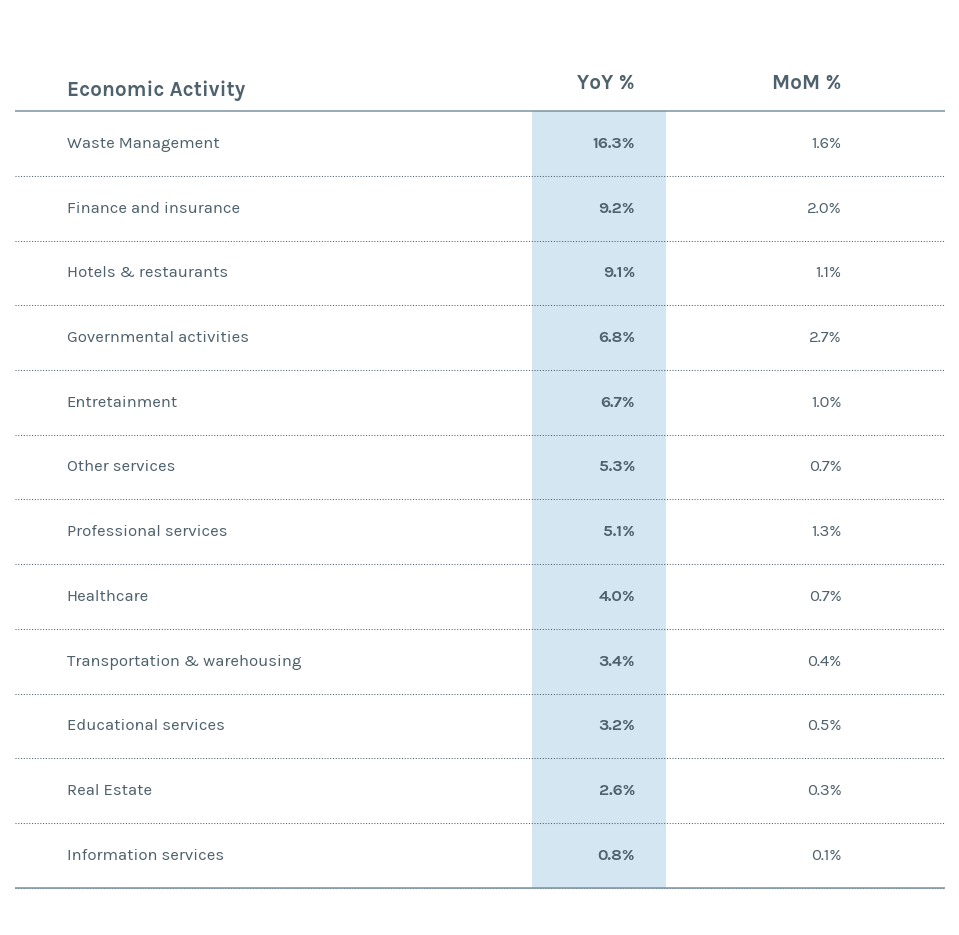

In [23]:
    fig = plt.figure(figsize = (8,8), dpi = 150)
    ax = fig.add_subplot(111)
    rows = 12
    cols = 4

    # create a coordinate system based on the number of rows/columns

    # adding a bit of padding on bottom (-1), top (1), right (0.5)

    ax.set_ylim(-1, rows + 1)
    ax.set_xlim(0, cols + .5)

    for row in range(rows):
        # extract the row data from the list

        d = data.iloc[row,:]

        ax.text(x=.25, y=row, s=d["economic_activity"], va='center', ha='left', size = 8)
        # ax.text(x=1.45, y=row, s=d['primary'], va='center', ha='left', size = 8)
        ax.text(x=3, y=row, s=f"{d['yoy_change']:.1%}", va='center', weight= "bold", ha='right', size = 8)
        ax.text(x=4, y=row, s=f"{d['mom_change']:.1%}", va='center', ha='right', size = 8)


    ax.text(.25, rows - .25, 'Economic Activity', weight='bold', ha='left', size = 10)
    # ax.text(1.45, rows - .15, 'Group', weight='bold', ha='left', size = 10)
    ax.text(3, rows - .15, 'YoY %', weight='bold', ha='right', size = 10)
    ax.text(4, rows - .15, 'MoM %', weight='bold', ha='right', size = 10)

    for row in range(rows):
        ax.plot(
            [0, cols + 1],
            [row -.5, row - .5],
            ls=':',
            lw='.5',
            c='#4E616C'
        )

    ax.plot([0, cols + 1], [rows - .5, rows - .5], lw='.75', c='#7D94A1')
    ax.plot([0, cols + 1], [0 - .5, 0 - .5], lw='.75', c='#7D94A1')

    rect = patches.Rectangle(
        (2.5, -.5),  # bottom left starting position (x,y)
        .65,  # width
        rows,  # height
        ec='none',
        fc='#2384ba',
        alpha=.2,
        zorder=-1
    )
    ax.add_patch(rect)
    ax.axis('off')